<a href="https://colab.research.google.com/github/Demon-Sheriff/Linear-Alg_ML_fs/blob/master/OLA_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!gdown 16g-OJ_4GnG0P8FEFgTa50RMubVSBvIZl

Downloading...
From: https://drive.google.com/uc?id=16g-OJ_4GnG0P8FEFgTa50RMubVSBvIZl
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 13.4MB/s]


In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('/content/ola_driver_scaler.csv')
data = pd.DataFrame(data)

In [7]:
data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'])

<ipython-input-7-dd2e659bcc52>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'])


In [8]:
data.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            19104 non-null  int64         
 1   MMM-YY                19104 non-null  object        
 2   Driver_ID             19104 non-null  int64         
 3   Age                   19043 non-null  float64       
 4   Gender                19052 non-null  float64       
 5   City                  19104 non-null  object        
 6   Education_Level       19104 non-null  int64         
 7   Income                19104 non-null  int64         
 8   Dateofjoining         19104 non-null  object        
 9   LastWorkingDate       1616 non-null   datetime64[ns]
 10  Joining Designation   19104 non-null  int64         
 11  Grade                 19104 non-null  int64         
 12  Total Business Value  19104 non-null  int64         
 13  Quarterly Rating

In [10]:
data = data.drop(columns=['Unnamed: 0'])

In [11]:
data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'])
data['MMM-YY'] = pd.to_datetime(data['MMM-YY'])

<ipython-input-11-1407db1ea250>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'])
<ipython-input-11-1407db1ea250>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['MMM-YY'] = pd.to_datetime(data['MMM-YY'])


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [13]:
data

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2


In [14]:
data[data['Driver_ID'] == 2784]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
19055,2019-01-01,2784,33.0,0.0,C24,0,82815,2015-10-15,NaT,2,3,1226590,3
19056,2019-02-01,2784,33.0,0.0,C24,0,82815,2015-10-15,NaT,2,3,203290,3
19057,2019-03-01,2784,33.0,0.0,C24,0,82815,2015-10-15,NaT,2,3,4495040,3
19058,2019-04-01,2784,33.0,0.0,C24,0,82815,2015-10-15,NaT,2,3,100450,1
19059,2019-05-01,2784,33.0,0.0,C24,0,82815,2015-10-15,NaT,2,3,226010,1
19060,2019-06-01,2784,33.0,0.0,C24,0,82815,2015-10-15,NaT,2,3,0,1
19061,2019-07-01,2784,33.0,0.0,C24,0,82815,2015-10-15,NaT,2,3,102770,1
19062,2019-08-01,2784,33.0,0.0,C24,0,82815,2015-10-15,NaT,2,3,270710,1
19063,2019-09-01,2784,33.0,0.0,C24,0,82815,2015-10-15,NaT,2,3,271380,1
19064,2019-10-01,2784,33.0,0.0,C24,0,82815,2015-10-15,NaT,2,3,990000,3


In [15]:
data[data['Gender'] != 0.0] # num of female drivers.

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
13,2020-08-01,6,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,0,1
14,2020-09-01,6,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,0,1
15,2020-10-01,6,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,0,2
16,2020-11-01,6,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,1265000,2
17,2020-12-01,6,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19092,2019-02-01,2787,28.0,1.0,C20,2,69498,2018-07-21,NaT,1,1,250000,2
19093,2019-03-01,2787,28.0,1.0,C20,2,69498,2018-07-21,NaT,1,1,319740,2
19094,2019-04-01,2787,28.0,1.0,C20,2,69498,2018-07-21,NaT,1,1,0,1
19095,2019-05-01,2787,28.0,1.0,C20,2,69498,2018-07-21,NaT,1,1,0,1


In [83]:
df = data

In [84]:
df.groupby('Driver_ID').agg({
    'Grade': 'mean'
}).nlargest(10, 'Grade')

,Grade
Driver_ID,
117,5.0
153,5.0
308,5.0
451,5.0
709,5.0
1271,5.0
1616,5.0
1731,5.0
1761,5.0


In [85]:
# number of unique driver ids., num unique grades
data['Driver_ID'].nunique(), data['Grade'].nunique()

(2381, 5)

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
cols = {
    "MMM-YY": "last",
    "Driver_ID": "last",
    "Age": "last",
    "Gender": "last",
    "City": "last",
    "Education_Level": "last",
    "Income": "last",
    "Dateofjoining": "last",
    "LastWorkingDate": "last",
    "Joining Designation": "last",
    "Grade": "last",
    "Total Business Value": "sum",
    "Quarterly Rating": "last"
}

In [88]:
# checking age difference statistics
old = data.groupby('Driver_ID').agg({
    'Age': 'first'
})

latest = data.groupby('Driver_ID').agg({
    'Age': 'last'
})

(latest - old).describe()

,Age
count,2381.000000
mean,0.572449
std,0.691106
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


<Axes: ylabel='Density'>

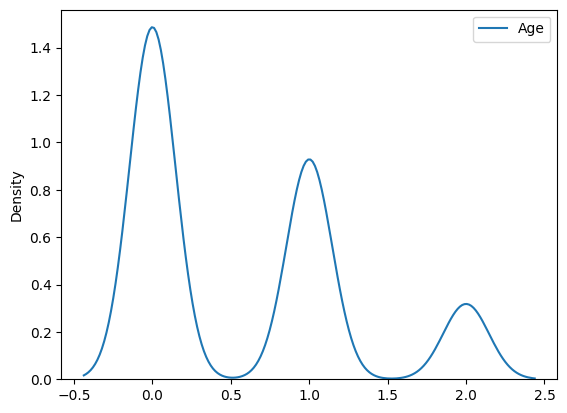

In [89]:
sns.kdeplot(latest - old)

In [90]:
qri = data.groupby('Driver_ID').agg({
    'Quarterly Rating': 'first'
})

qrl = data.groupby('Driver_ID').agg({
    'Quarterly Rating': 'last'
})

(qrl - qri).describe()

diff = qrl - qri
diff

,Quarterly Rating
Driver_ID,
1,0
2,0
4,0
5,0
6,1
...,...
2784,1
2785,0
2786,-1


<Axes: ylabel='Density'>

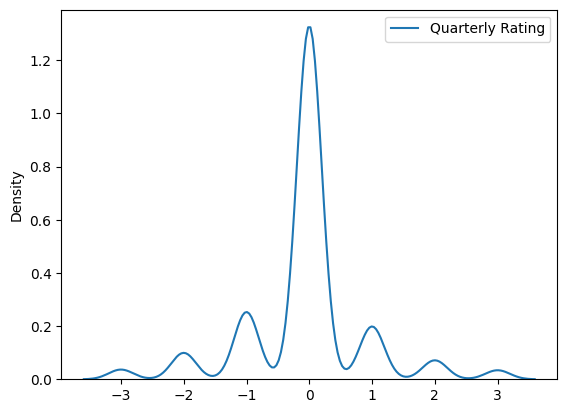

In [91]:
sns.kdeplot(diff)

In [92]:
df = df.groupby('Driver_ID').agg({
    'LastWorkingDate': 'last',
    'Dateofjoining': 'first',
    'City': 'first',
    'Gender': 'first',
    'Education_Level': 'first',
    'Income': 'mean',
    'Joining Designation': 'first',
    "MMM-YY": "last",
    "Total Business Value": "sum",
    'Grade': 'mean',
})

df['start_age'] = data.groupby('Driver_ID').agg({
    'Age': 'first'
})

df['end_age'] = data.groupby('Driver_ID').agg({
    'Age': 'last'
})

df.reset_index(inplace=True)

df

,Driver_ID,LastWorkingDate,Dateofjoining,City,Gender,Education_Level,Income,Joining Designation,MMM-YY,Total Business Value,Grade,start_age,end_age
0,1,2019-03-11,2018-12-24,C23,0.0,2,57387.0,1,2019-03-01,1715580,1.0,28.0,28.0
1,2,NaT,2020-11-06,C7,0.0,2,67016.0,2,2020-12-01,0,2.0,31.0,31.0
2,4,2020-04-27,2019-12-07,C13,0.0,2,65603.0,2,2020-04-01,350000,2.0,43.0,43.0
3,5,2019-03-07,2019-01-09,C9,0.0,0,46368.0,1,2019-03-01,120360,1.0,29.0,29.0
4,6,NaT,2020-07-31,C11,1.0,1,78728.0,3,2020-12-01,1265000,3.0,31.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,NaT,2015-10-15,C24,0.0,0,82815.0,2,2020-12-01,21748820,3.0,33.0,34.0
2377,2785,2020-10-28,2020-08-28,C9,1.0,0,12105.0,1,2020-10-01,0,1.0,34.0,34.0
2378,2786,2019-09-22,2018-07-31,C19,0.0,0,35370.0,2,2019-09-01,2815090,2.0,44.0,45.0
2379,2787,2019-06-20,2018-07-21,C20,1.0,2,69498.0,1,2019-06-01,977830,1.0,28.0,28.0


In [93]:
df = pd.merge(df, diff[['Quarterly Rating']], on='Driver_ID')
df.rename(columns={'Quarterly Rating': 'rating_increase'}, inplace=True)
df

,Driver_ID,LastWorkingDate,Dateofjoining,City,Gender,Education_Level,Income,Joining Designation,MMM-YY,Total Business Value,Grade,start_age,end_age,rating_increase
0,1,2019-03-11,2018-12-24,C23,0.0,2,57387.0,1,2019-03-01,1715580,1.0,28.0,28.0,0
1,2,NaT,2020-11-06,C7,0.0,2,67016.0,2,2020-12-01,0,2.0,31.0,31.0,0
2,4,2020-04-27,2019-12-07,C13,0.0,2,65603.0,2,2020-04-01,350000,2.0,43.0,43.0,0
3,5,2019-03-07,2019-01-09,C9,0.0,0,46368.0,1,2019-03-01,120360,1.0,29.0,29.0,0
4,6,NaT,2020-07-31,C11,1.0,1,78728.0,3,2020-12-01,1265000,3.0,31.0,31.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,NaT,2015-10-15,C24,0.0,0,82815.0,2,2020-12-01,21748820,3.0,33.0,34.0,1
2377,2785,2020-10-28,2020-08-28,C9,1.0,0,12105.0,1,2020-10-01,0,1.0,34.0,34.0,0
2378,2786,2019-09-22,2018-07-31,C19,0.0,0,35370.0,2,2019-09-01,2815090,2.0,44.0,45.0,-1
2379,2787,2019-06-20,2018-07-21,C20,1.0,2,69498.0,1,2019-06-01,977830,1.0,28.0,28.0,-1


In [94]:
# checking for null values
df.isnull().sum()

,0
Driver_ID,0
LastWorkingDate,765
Dateofjoining,0
City,0
Gender,0
Education_Level,0
Income,0
Joining Designation,0
MMM-YY,0
Total Business Value,0


In [95]:
# making the churn column
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])
df.loc[df['LastWorkingDate'].isnull(), 'Churn'] = 1
df.loc[df['LastWorkingDate'].notnull(), 'Churn'] = 0
df

,Driver_ID,LastWorkingDate,Dateofjoining,City,Gender,Education_Level,Income,Joining Designation,MMM-YY,Total Business Value,Grade,start_age,end_age,rating_increase,Churn
0,1,2019-03-11,2018-12-24,C23,0.0,2,57387.0,1,2019-03-01,1715580,1.0,28.0,28.0,0,0.0
1,2,NaT,2020-11-06,C7,0.0,2,67016.0,2,2020-12-01,0,2.0,31.0,31.0,0,1.0
2,4,2020-04-27,2019-12-07,C13,0.0,2,65603.0,2,2020-04-01,350000,2.0,43.0,43.0,0,0.0
3,5,2019-03-07,2019-01-09,C9,0.0,0,46368.0,1,2019-03-01,120360,1.0,29.0,29.0,0,0.0
4,6,NaT,2020-07-31,C11,1.0,1,78728.0,3,2020-12-01,1265000,3.0,31.0,31.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,NaT,2015-10-15,C24,0.0,0,82815.0,2,2020-12-01,21748820,3.0,33.0,34.0,1,1.0
2377,2785,2020-10-28,2020-08-28,C9,1.0,0,12105.0,1,2020-10-01,0,1.0,34.0,34.0,0,0.0
2378,2786,2019-09-22,2018-07-31,C19,0.0,0,35370.0,2,2019-09-01,2815090,2.0,44.0,45.0,-1,0.0
2379,2787,2019-06-20,2018-07-21,C20,1.0,2,69498.0,1,2019-06-01,977830,1.0,28.0,28.0,-1,0.0


In [96]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

In [97]:
num_cols

Index(['Driver_ID', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Total Business Value', 'Grade', 'start_age',
       'end_age', 'rating_increase', 'Churn'],
      dtype='object')

In [98]:
# Extract all the numerical columns first
num_data = df.select_dtypes(include=np.number)
num_data.isnull().sum()

,0
Driver_ID,0
Gender,0
Education_Level,0
Income,0
Joining Designation,0
Total Business Value,0
Grade,0
start_age,0
end_age,0
rating_increase,0


In [99]:
cat_cols

Index(['LastWorkingDate', 'Dateofjoining', 'City', 'MMM-YY'], dtype='object')

In [100]:
# imputing the null values in the Last working date column.
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights="uniform", metric="nan_euclidean")
imputed_data = imputer.fit_transform(num_data)
df_imputed = pd.DataFrame(imputed_data, columns=num_data.columns)

In [104]:
# Extract components from data
df['Year'] = df['Dateofjoining'].dt.year
df['Month'] = df['Dateofjoining'].dt.month
df['Day'] = df['Dateofjoining'].dt.day
df['Weekday'] = df['Dateofjoining'].dt.weekday  # Monday=0, Sunday=6
df['DayOfYear'] = df['Dateofjoining'].dt.dayofyear
df['Quarter'] = df['Dateofjoining'].dt.quarter
df['IsWeekend'] = df['Dateofjoining'].dt.weekday >= 5  # True if Saturday or Sunday

df

,Driver_ID,LastWorkingDate,Dateofjoining,City,Gender,Education_Level,Income,Joining Designation,MMM-YY,Total Business Value,...,end_age,rating_increase,Churn,Year,Month,Day,Weekday,DayOfYear,Quarter,IsWeekend
0,1,2019-03-11,2018-12-24,C23,0.0,2,57387.0,1,2019-03-01,1715580,...,28.0,0,0.0,2018,12,24,0,358,4,False
1,2,NaT,2020-11-06,C7,0.0,2,67016.0,2,2020-12-01,0,...,31.0,0,1.0,2020,11,6,4,311,4,False
2,4,2020-04-27,2019-12-07,C13,0.0,2,65603.0,2,2020-04-01,350000,...,43.0,0,0.0,2019,12,7,5,341,4,True
3,5,2019-03-07,2019-01-09,C9,0.0,0,46368.0,1,2019-03-01,120360,...,29.0,0,0.0,2019,1,9,2,9,1,False
4,6,NaT,2020-07-31,C11,1.0,1,78728.0,3,2020-12-01,1265000,...,31.0,1,1.0,2020,7,31,4,213,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,NaT,2015-10-15,C24,0.0,0,82815.0,2,2020-12-01,21748820,...,34.0,1,1.0,2015,10,15,3,288,4,False
2377,2785,2020-10-28,2020-08-28,C9,1.0,0,12105.0,1,2020-10-01,0,...,34.0,0,0.0,2020,8,28,4,241,3,False
2378,2786,2019-09-22,2018-07-31,C19,0.0,0,35370.0,2,2019-09-01,2815090,...,45.0,-1,0.0,2018,7,31,1,212,3,False
2379,2787,2019-06-20,2018-07-21,C20,1.0,2,69498.0,1,2019-06-01,977830,...,28.0,-1,0.0,2018,7,21,5,202,3,True


In [110]:
df['IsWeekend'] = df['IsWeekend'].apply(lambda x: 1 if x else 0)
df

,Driver_ID,LastWorkingDate,Dateofjoining,City,Gender,Education_Level,Income,Joining Designation,MMM-YY,Total Business Value,...,end_age,rating_increase,Churn,Year,Month,Day,Weekday,DayOfYear,Quarter,IsWeekend
0,1,2019-03-11,2018-12-24,C23,0.0,2,57387.0,1,2019-03-01,1715580,...,28.0,0,0.0,2018,12,24,0,358,4,0
1,2,NaT,2020-11-06,C7,0.0,2,67016.0,2,2020-12-01,0,...,31.0,0,1.0,2020,11,6,4,311,4,0
2,4,2020-04-27,2019-12-07,C13,0.0,2,65603.0,2,2020-04-01,350000,...,43.0,0,0.0,2019,12,7,5,341,4,1
3,5,2019-03-07,2019-01-09,C9,0.0,0,46368.0,1,2019-03-01,120360,...,29.0,0,0.0,2019,1,9,2,9,1,0
4,6,NaT,2020-07-31,C11,1.0,1,78728.0,3,2020-12-01,1265000,...,31.0,1,1.0,2020,7,31,4,213,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,NaT,2015-10-15,C24,0.0,0,82815.0,2,2020-12-01,21748820,...,34.0,1,1.0,2015,10,15,3,288,4,0
2377,2785,2020-10-28,2020-08-28,C9,1.0,0,12105.0,1,2020-10-01,0,...,34.0,0,0.0,2020,8,28,4,241,3,0
2378,2786,2019-09-22,2018-07-31,C19,0.0,0,35370.0,2,2019-09-01,2815090,...,45.0,-1,0.0,2018,7,31,1,212,3,0
2379,2787,2019-06-20,2018-07-21,C20,1.0,2,69498.0,1,2019-06-01,977830,...,28.0,-1,0.0,2018,7,21,5,202,3,1


In [111]:
train_data = df.drop(columns=['Dateofjoining', 'MMM-YY'])
train_data

,Driver_ID,LastWorkingDate,City,Gender,Education_Level,Income,Joining Designation,Total Business Value,Grade,start_age,end_age,rating_increase,Churn,Year,Month,Day,Weekday,DayOfYear,Quarter,IsWeekend
0,1,2019-03-11,C23,0.0,2,57387.0,1,1715580,1.0,28.0,28.0,0,0.0,2018,12,24,0,358,4,0
1,2,NaT,C7,0.0,2,67016.0,2,0,2.0,31.0,31.0,0,1.0,2020,11,6,4,311,4,0
2,4,2020-04-27,C13,0.0,2,65603.0,2,350000,2.0,43.0,43.0,0,0.0,2019,12,7,5,341,4,1
3,5,2019-03-07,C9,0.0,0,46368.0,1,120360,1.0,29.0,29.0,0,0.0,2019,1,9,2,9,1,0
4,6,NaT,C11,1.0,1,78728.0,3,1265000,3.0,31.0,31.0,1,1.0,2020,7,31,4,213,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,NaT,C24,0.0,0,82815.0,2,21748820,3.0,33.0,34.0,1,1.0,2015,10,15,3,288,4,0
2377,2785,2020-10-28,C9,1.0,0,12105.0,1,0,1.0,34.0,34.0,0,0.0,2020,8,28,4,241,3,0
2378,2786,2019-09-22,C19,0.0,0,35370.0,2,2815090,2.0,44.0,45.0,-1,0.0,2018,7,31,1,212,3,0
2379,2787,2019-06-20,C20,1.0,2,69498.0,1,977830,1.0,28.0,28.0,-1,0.0,2018,7,21,5,202,3,1


In [117]:
# converting the last working date column to timestamp number and then imputing it
train_data['LastWorkingDate'] = pd.to_datetime(train_data['LastWorkingDate'])
train_data['LastWorkingDateTimestamp'] = train_data['LastWorkingDate'].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights="uniform", metric="nan_euclidean")
train_data['LastWorkingDateTimestamp'] = imputer.fit_transform(train_data[['LastWorkingDateTimestamp']])

train_data = train_data.drop(columns = ['LastWorkingDate'])

In [118]:
train_data.isnull().sum()

,0
Driver_ID,0
City,0
Gender,0
Education_Level,0
Income,0
Joining Designation,0
Total Business Value,0
Grade,0
start_age,0
end_age,0


In [119]:
# encode the cat labels...
num_cols = train_data.select_dtypes(include=np.number).columns
cat_cols = train_data.select_dtypes(exclude=np.number).columns

In [120]:
num_cols

Index(['Driver_ID', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Total Business Value', 'Grade', 'start_age',
       'end_age', 'rating_increase', 'Churn', 'Year', 'Month', 'Day',
       'Weekday', 'DayOfYear', 'Quarter', 'IsWeekend',
       'LastWorkingDateTimestamp'],
      dtype='object')

In [121]:
cat_cols

Index(['City'], dtype='object')

In [122]:
train_data[cat_cols].nunique() # number of unique cities

,0
City,29


<Axes: xlabel='count', ylabel='Density'>

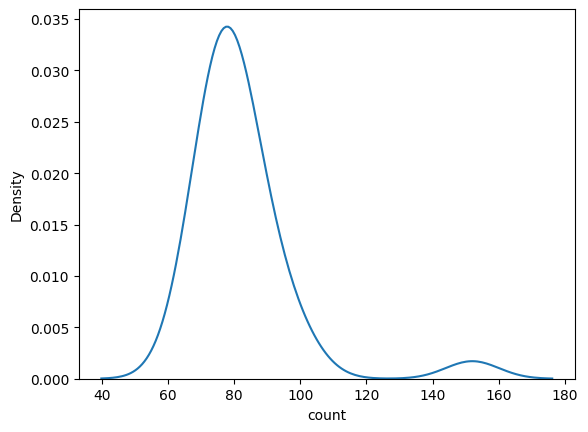

In [129]:
# encoding the cities using frequency encoding...
freq_dist = train_data['City'].value_counts()
sns.kdeplot(freq_dist)

In [130]:
train_data['City_encoded'] = train_data['City'].map(freq_dist)
train_data

,Driver_ID,City,Gender,Education_Level,Income,Joining Designation,Total Business Value,Grade,start_age,end_age,...,Churn,Year,Month,Day,Weekday,DayOfYear,Quarter,IsWeekend,LastWorkingDateTimestamp,City_encoded
0,1,C23,0.0,2,57387.0,1,1715580,1.0,28.0,28.0,...,0.0,2018,12,24,0,358,4,0,1.552262e+09,74
1,2,C7,0.0,2,67016.0,2,0,2.0,31.0,31.0,...,1.0,2020,11,6,4,311,4,0,1.576962e+09,76
2,4,C13,0.0,2,65603.0,2,350000,2.0,43.0,43.0,...,0.0,2019,12,7,5,341,4,1,1.587946e+09,71
3,5,C9,0.0,0,46368.0,1,120360,1.0,29.0,29.0,...,0.0,2019,1,9,2,9,1,0,1.551917e+09,75
4,6,C11,1.0,1,78728.0,3,1265000,3.0,31.0,31.0,...,1.0,2020,7,31,4,213,3,0,1.576962e+09,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,C24,0.0,0,82815.0,2,21748820,3.0,33.0,34.0,...,1.0,2015,10,15,3,288,4,0,1.576962e+09,73
2377,2785,C9,1.0,0,12105.0,1,0,1.0,34.0,34.0,...,0.0,2020,8,28,4,241,3,0,1.603843e+09,75
2378,2786,C19,0.0,0,35370.0,2,2815090,2.0,44.0,45.0,...,0.0,2018,7,31,1,212,3,0,1.569110e+09,72
2379,2787,C20,1.0,2,69498.0,1,977830,1.0,28.0,28.0,...,0.0,2018,7,21,5,202,3,1,1.560989e+09,152


In [131]:
train_data.isnull().sum()

,0
Driver_ID,0
City,0
Gender,0
Education_Level,0
Income,0
Joining Designation,0
Total Business Value,0
Grade,0
start_age,0
end_age,0


1. impute the null values -> use KNN imputer
  1.1 Knn imputer only takes numerical values so segregate the dataframe seperately and then impute them
  
2. after imputing the numerical values concatenate the categorical features data set and the numerically imputed df , :: HINT: we can make use of a set to ge the differences between the columns, you can figure that out.

3.

In [135]:
data_final = train_data.drop(columns=['City', 'Driver_ID'])
data_final

,Gender,Education_Level,Income,Joining Designation,Total Business Value,Grade,start_age,end_age,rating_increase,Churn,Year,Month,Day,Weekday,DayOfYear,Quarter,IsWeekend,LastWorkingDateTimestamp,City_encoded
0,0.0,2,57387.0,1,1715580,1.0,28.0,28.0,0,0.0,2018,12,24,0,358,4,0,1.552262e+09,74
1,0.0,2,67016.0,2,0,2.0,31.0,31.0,0,1.0,2020,11,6,4,311,4,0,1.576962e+09,76
2,0.0,2,65603.0,2,350000,2.0,43.0,43.0,0,0.0,2019,12,7,5,341,4,1,1.587946e+09,71
3,0.0,0,46368.0,1,120360,1.0,29.0,29.0,0,0.0,2019,1,9,2,9,1,0,1.551917e+09,75
4,1.0,1,78728.0,3,1265000,3.0,31.0,31.0,1,1.0,2020,7,31,4,213,3,0,1.576962e+09,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.0,0,82815.0,2,21748820,3.0,33.0,34.0,1,1.0,2015,10,15,3,288,4,0,1.576962e+09,73
2377,1.0,0,12105.0,1,0,1.0,34.0,34.0,0,0.0,2020,8,28,4,241,3,0,1.603843e+09,75
2378,0.0,0,35370.0,2,2815090,2.0,44.0,45.0,-1,0.0,2018,7,31,1,212,3,0,1.569110e+09,72
2379,1.0,2,69498.0,1,977830,1.0,28.0,28.0,-1,0.0,2018,7,21,5,202,3,1,1.560989e+09,152


In [137]:
# First we are going to try out tree based ensembles so scaling wont affect the data that much.
from sklearn.model_selection import train_test_split

X = data_final.drop(columns=['Churn'])
y = data_final['Churn']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1904, 18)
Testing set size: (477, 18)


In [142]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.5)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [146]:
ada_y_pred = ada_clf.predict(X_test)
ada_y_train_pred = ada_clf.predict(X_train)

In [147]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, ada_y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       327
         1.0       1.00      1.00      1.00       150

    accuracy                           1.00       477
   macro avg       1.00      1.00      1.00       477
weighted avg       1.00      1.00      1.00       477



In [148]:
print(classification_report(y_train, ada_y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1289
         1.0       1.00      1.00      1.00       615

    accuracy                           1.00      1904
   macro avg       1.00      1.00      1.00      1904
weighted avg       1.00      1.00      1.00      1904



In [169]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

# List of individual trees in the AdaBoost ensemble
trees = ada_clf.estimators_

# Features from the training dataset
features = list(X_train.columns)

# Iterate through each tree in the ensemble
for i, tree in enumerate(trees):
    dot_data = StringIO()

    # Export the current tree to DOT format
    export_graphviz(tree, out_file=dot_data, feature_names=features, filled=True)

    # Create a graph from the DOT data
    graph = pydot.graph_from_dot_data(dot_data.getvalue())

    # Display the image of the tree
    (Image(graph[0].create_png()))

    # Optionally, save the tree image
    graph[0].write_png(f'tree_{i}.png')


# Using random forest classifier...

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold, cross_val_score

kfold = KFold(n_splits=10)

rf = RandomForestClassifier()

cv_acc_results = cross_validate(rf, X_train, y_train, cv= kfold, scoring='f1',return_train_score=True)

print(f"Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

Accuracy Mean: Train: 100.0 Validation: 99.91735537190083
Accuracy Std: Train: 0.0 Validation: 0.2479338842975198


In [155]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scoring
scores = cross_val_score(rf_classifier, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)

# Print results
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.4f}")

Cross-validation scores: [0.99180328 0.97925311 0.99180328 0.95319149 0.99180328]
Mean cross-validation score: 0.9816


In [156]:
# checking rf_classifier on the test set.
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       327
         1.0       1.00      0.94      0.97       150

    accuracy                           0.98       477
   macro avg       0.99      0.97      0.98       477
weighted avg       0.98      0.98      0.98       477



# Let's apply some grid search and tune the hyperparameters for RF

In [159]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}

scorer = make_scorer(f1_score, pos_label=1)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=True, scoring=scorer)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
58 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score: 0.9991902834008097


In [160]:
grid_model = grid_search.best_estimator_

In [161]:
grid_y_pred = grid_model.predict(X_test)
print(classification_report(y_test, grid_y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       327
         1.0       0.99      1.00      1.00       150

    accuracy                           1.00       477
   macro avg       1.00      1.00      1.00       477
weighted avg       1.00      1.00      1.00       477



# Applying Logistic regression

In [191]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [199]:
# checking for class imbalance
y_train.value_counts()

,count
Churn,
0.0,1289
1.0,615


In [200]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(class_weight='balanced') # start with a basic logistic regression model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scoring
scores = cross_val_score(rf_classifier, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)

# Print results
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.4f}")

Cross-validation scores: [0.99180328 0.97925311 0.99180328 0.95319149 0.99180328]
Mean cross-validation score: 0.9816


In [201]:
model_lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [202]:
y_pred_model_lr = model_lr.predict(X_test)
print(classification_report(y_test, y_pred_model_lr))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       327
         1.0       0.90      0.89      0.89       150

    accuracy                           0.93       477
   macro avg       0.92      0.92      0.92       477
weighted avg       0.93      0.93      0.93       477



In [204]:
# applying grid search for logistic regression...
param_grid = {
    'C': [0.01, 0.1, 1, 10],             # Regularization parameter
    'penalty': ['l2', 'elasticnet'],     # Regularization types
    'solver': ['lbfgs', 'liblinear'],  # Optimization algorithms
    'class_weight': ['balanced', None]  # Class weights
}

In [205]:
scorer = make_scorer(f1_score, pos_label = 1)
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid = param_grid, cv=5, scoring=scorer, verbose=True, n_jobs=-1)

In [206]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': ['balanced', None],
                         'penalty': ['l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1),
             verbose=True)

In [207]:
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 Score: 0.8952796329153803


In [208]:
# applying smote over-sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model_lr.fit(X_resampled, y_resampled)

LogisticRegression(class_weight='balanced')

In [209]:
y_pred_smote_model_lr = model_lr.predict(X_test)
print(classification_report(y_test, y_pred_smote_model_lr))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       327
         1.0       0.91      0.89      0.90       150

    accuracy                           0.94       477
   macro avg       0.93      0.93      0.93       477
weighted avg       0.94      0.94      0.94       477



In [210]:
# applying grid search over the over-sampled data
param_grid = {
    'max_iter': [700, 1000, 1500],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky'],
    'class_weight': ['balanced', None],
    'fit_intercept': [True, False],
    'tol': [1e-4, 1e-3, 1e-2],
}

In [211]:
grid_search_smote = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv=5, scoring=scorer, verbose=True, n_jobs=-1)

In [212]:
grid_search_smote.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 4536 candidates, totalling 22680 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
12600 fits failed out of a total of 22680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1260 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', None],
                         'fit_intercept': [True, False],
                         'max_iter': [700, 1000, 1500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga', 'newton-cholesky'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1),
             verbose=True)

In [213]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Evaluate model
best_model = grid_search_smote.best_estimator_
y_pred_best_model_smote = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best_model_smote))

Best Hyperparameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 Score: 0.8952796329153803
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       327
         1.0       0.90      0.91      0.90       150

    accuracy                           0.94       477
   macro avg       0.93      0.93      0.93       477
weighted avg       0.94      0.94      0.94       477



In [217]:
best_model.fit(X_resampled, y_resampled)

LogisticRegression(C=1, fit_intercept=False, max_iter=700, penalty='l1',
                   solver='liblinear', tol=0.01)

In [218]:
y_pred_best_model_smote = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best_model_smote))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       327
         1.0       0.89      0.91      0.90       150

    accuracy                           0.94       477
   macro avg       0.92      0.93      0.93       477
weighted avg       0.94      0.94      0.94       477



In [221]:
weights = best_model.coef_

In [223]:
X_train = pd.DataFrame(X_train)

In [234]:
X_train.columns = data_final.drop(columns=['Churn']).columns

In [235]:

weights = best_model.coef_.flatten()  # Flatten to make it a 1D array if binary classification

# Create a DataFrame for better readability
feature_imps = pd.DataFrame(weights, columns=['Weight'], index=X_train.columns)

# Optionally, you can sort the DataFrame by the absolute value of the weights to highlight important features
feature_imps_sorted = feature_imps.reindex(feature_imps['Weight'].abs().sort_values(ascending=False).index)

# Display the feature importance sorted by the absolute value of the weights
print(feature_imps_sorted)


                            Weight
Total Business Value      6.409520
Year                      4.244082
LastWorkingDateTimestamp -1.809110
rating_increase           1.407269
start_age                -0.646491
end_age                   0.628567
Grade                     0.536758
DayOfYear                 0.493977
Quarter                   0.253398
Weekday                   0.180317
Month                     0.160584
IsWeekend                -0.131334
Joining Designation      -0.116770
Day                       0.106829
Gender                   -0.092528
City_encoded             -0.031967
Education_Level           0.004891
Income                    0.004748
